In [4]:
import sys

In [5]:
sys.path.append('../')

In [6]:
from model import atp_graph, losses
from Tutorials.helper import batcher
from data import synthetic_data_gen, feature_extractor
import keras
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import tensorflow as tf
import IPython
import time
import os

from model import atp_pipeline

In [23]:
df = pd.read_csv('../ATP/datasets/weather.csv')

In [28]:
df['T (degC)']

0        0.71
1        0.75
2        0.73
3        0.37
4        0.33
         ... 
52691    2.28
52692    2.13
52693    1.99
52694    2.07
52695    2.01
Name: T (degC), Length: 52696, dtype: float64

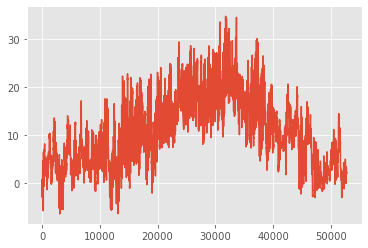

In [29]:
plt.plot(df['T (degC)'])

In [12]:
def weather_processor(path_to_weather_data):

        pd_array = pd.read_csv(path_to_weather_data)
        data = np.array(pd_array)
        data[:,0] = np.linspace(-1,1,data.shape[0])
        data = data.astype("float32")

        training_data = data[:int(0.7*data.shape[0])]
        val_data = data[int(0.7*data.shape[0]):int(0.8*data.shape[0])]
        test_data = data[int(0.8*data.shape[0]):]

        #scale

        training_data_scaled = (training_data - np.mean(training_data,axis=0))/np.std(training_data,axis=0)
        val_data_scaled = (val_data - np.mean(training_data,axis=0))/np.std(training_data,axis=0)
        test_data_scaled =  (test_data - np.mean(training_data,axis=0))/np.std(training_data,axis=0)

        x_train, y_train = training_data_scaled[:,:1], training_data_scaled[:,-1:]
        x_val, y_val = val_data_scaled[:,:1], val_data_scaled[:,-1:]
        x_test, y_test = test_data_scaled[:,:1], test_data_scaled[:,-1:]

        return x_train[:,:,np.newaxis], y_train[:,:,np.newaxis], x_val[:,:,np.newaxis], y_val[:,:,np.newaxis], x_test[:,:,np.newaxis], y_test[:,:,np.newaxis]


In [14]:
a,b,c,d,e,f = weather_processor('../ATP/datasets/exchange_rate.csv')

In [19]:
e.shape

(1518, 1, 1)

In [20]:
f.shape

(1518, 1, 1)

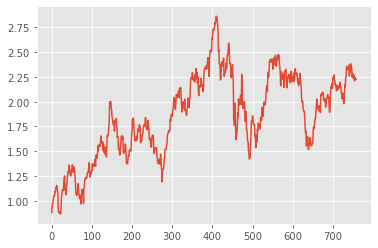

In [22]:
plt.plot(d.squeeze())